## **Image segmentation techniques with OpenCV**

> **Summary**: In this notebook, one demonstrates a few image detection algorithms and basic operations in OpenCV: exploring different image formats, thresholding, contours, extracting information, edge detection. 

> **Author**: Andrei Buiciuc, UBB Cluj-Napoca

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

%matplotlib inline

# Mount Google Drive to access stored images
from google.colab import drive
drive.mount('/content/drive')

print('Setup complete.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup complete.


Helper function to plot an image using the **matplotlib** module for Python.

In [2]:
def plot_image(image, title='Plot', figsize=(10,10)):
  fig = plt.figure(figsize=figsize)
  plt.imshow(image)
  plt.title(title)
  plt.axis('off')
  plt.show()

Helper function to plot multiple images in pairs.

In [3]:
def subplot_images(images, titles):
  fig = plt.figure(figsize=(10, 10))

  for i in range(len(images)):
    ax = fig.add_subplot(len(images) // 2, 2, i + 1)
    ax.set_title(titles[i])
    ax.axis('off')
    plt.imshow(images[i], 'gray')
  
  plt.show()

### **Color channels**

Explore different image formats and their respective channels.

* RGB color space ( R = Red, G = Green, B= Blue )
* HSV color space ( H = hue, S = saturation, V = value )
* LAB color space ( L = Lightness, A = range from Green to Magenta, B = range from Blue to Yellow ) 


In [4]:
# Open the image
image_1 = cv2.imread('/content/drive/MyDrive/projects/colab-notebooks/images/dog.jpg')

# In OpenCV, color images are interpreted as BGRB images; for convenience, one can
# convert them as RGB (the format for matplotlib)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

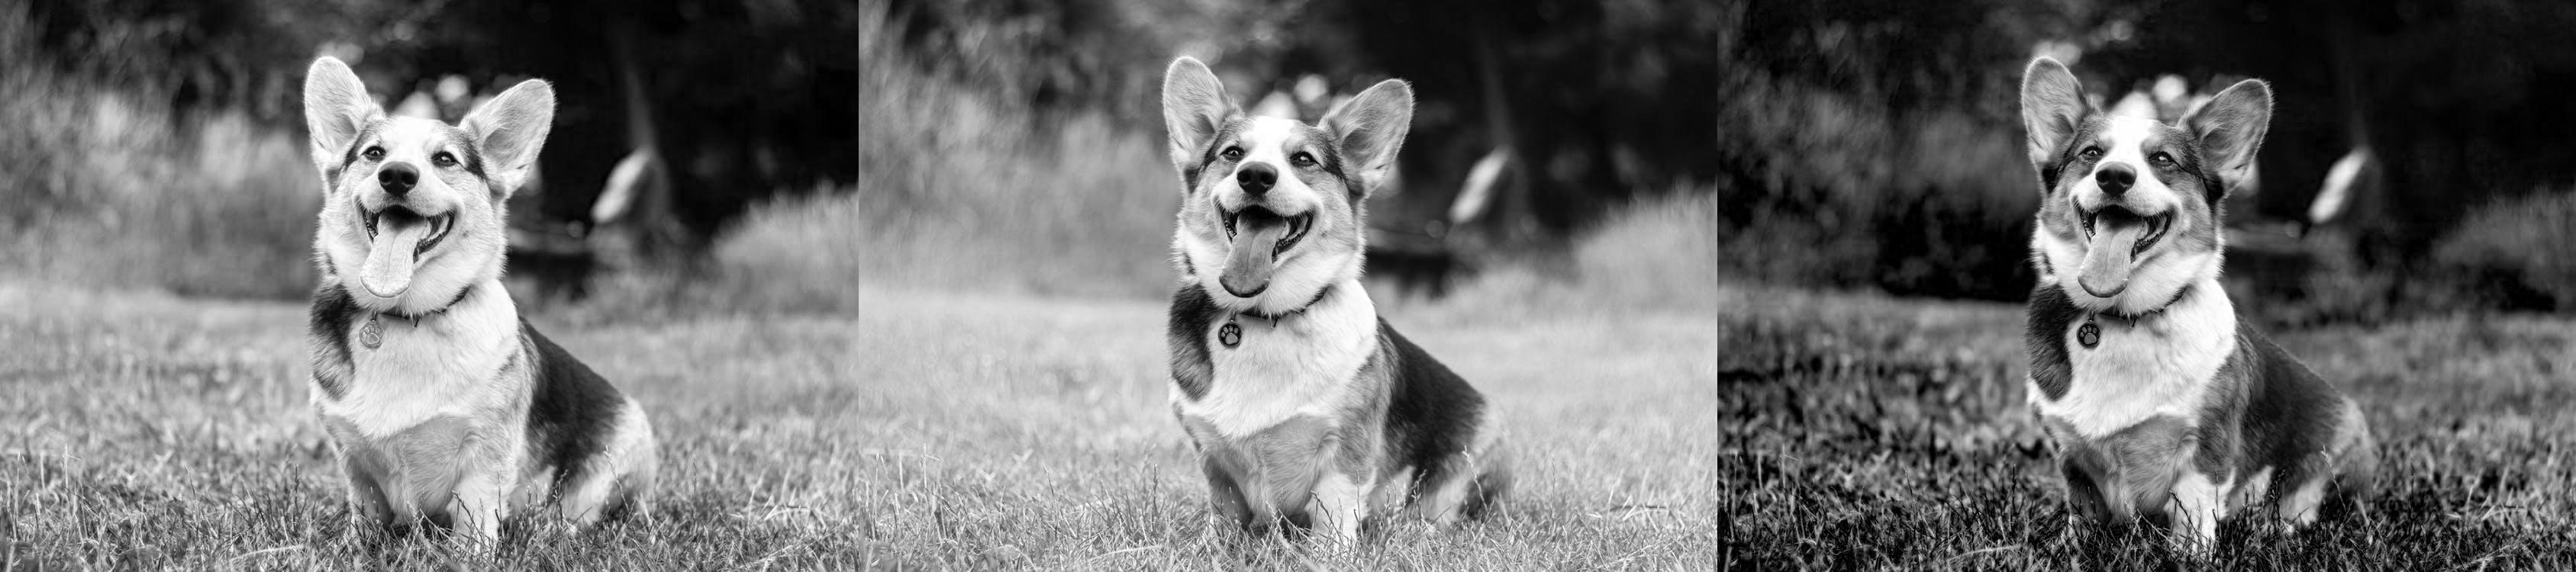

In [5]:
height, width, channels = image_1.shape

r = image_1[:,:,0]  # red channel
g = image_1[:,:,1]  # green channel
b = image_1[:,:,2]  # blue channel

# Create an image showing all channels in RGB format
rgb_split = np.concatenate((r, g, b), axis=1)

# Use the cv2_imshow substitution for google colab to display image
# or plot the image using the matplotlib module
cv2_imshow(rgb_split)

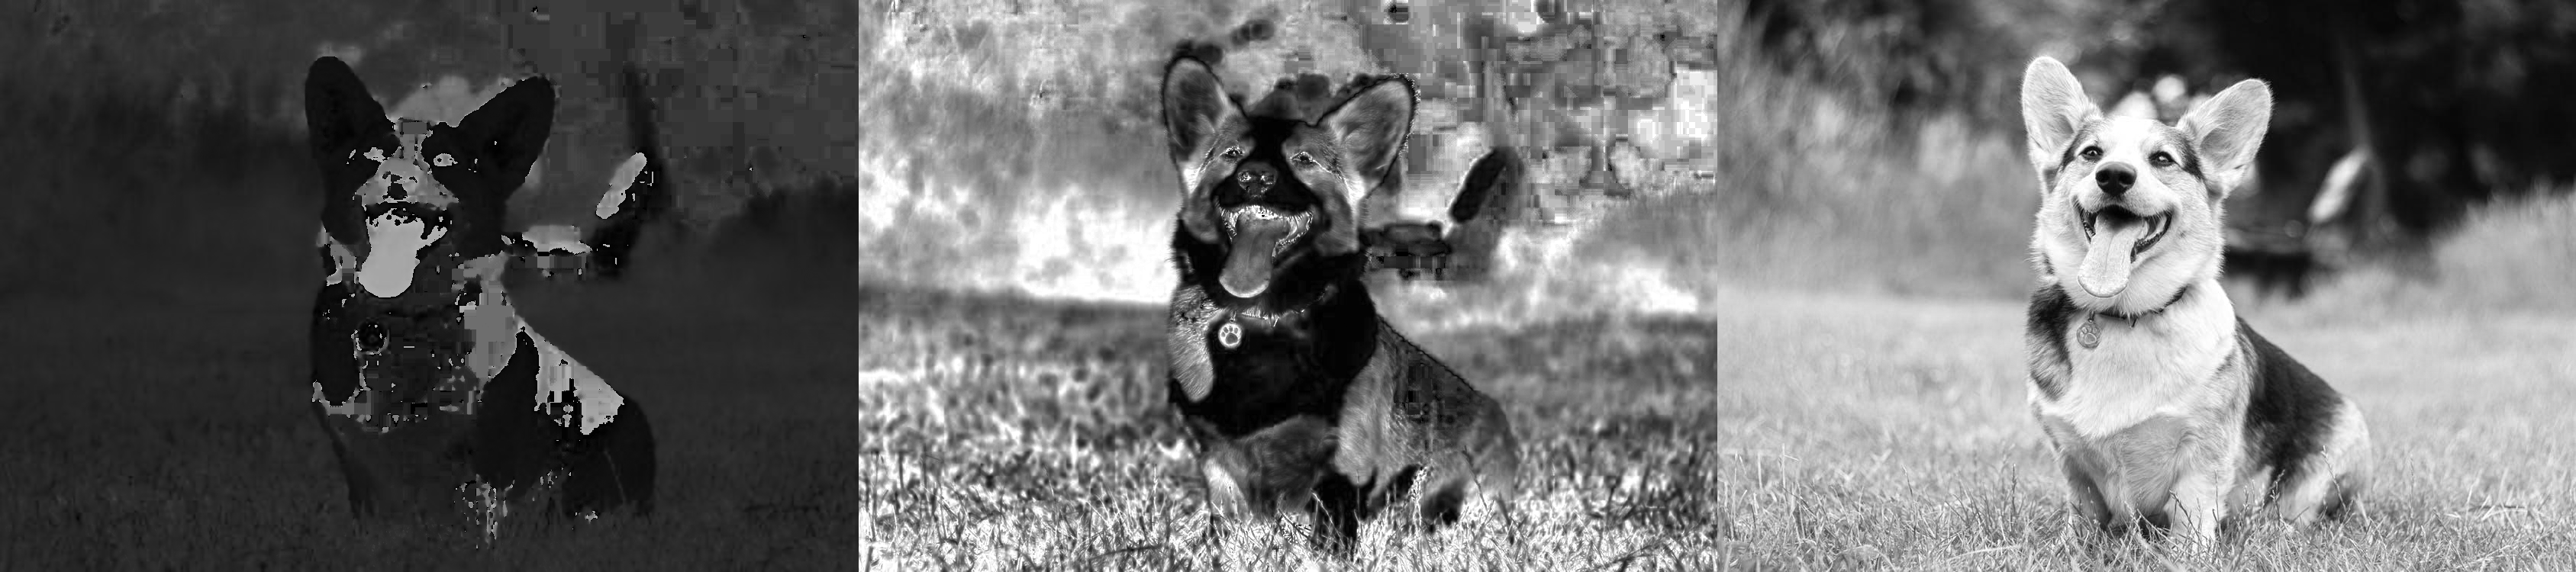

In [6]:
# Create an image showing all channels in a HSV format
hsv = cv2.cvtColor(image_1, cv2.COLOR_RGB2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Create the image showing all channels in HSV format
hsv_split = np.concatenate((h, s, v), axis=1)

cv2_imshow(hsv_split)

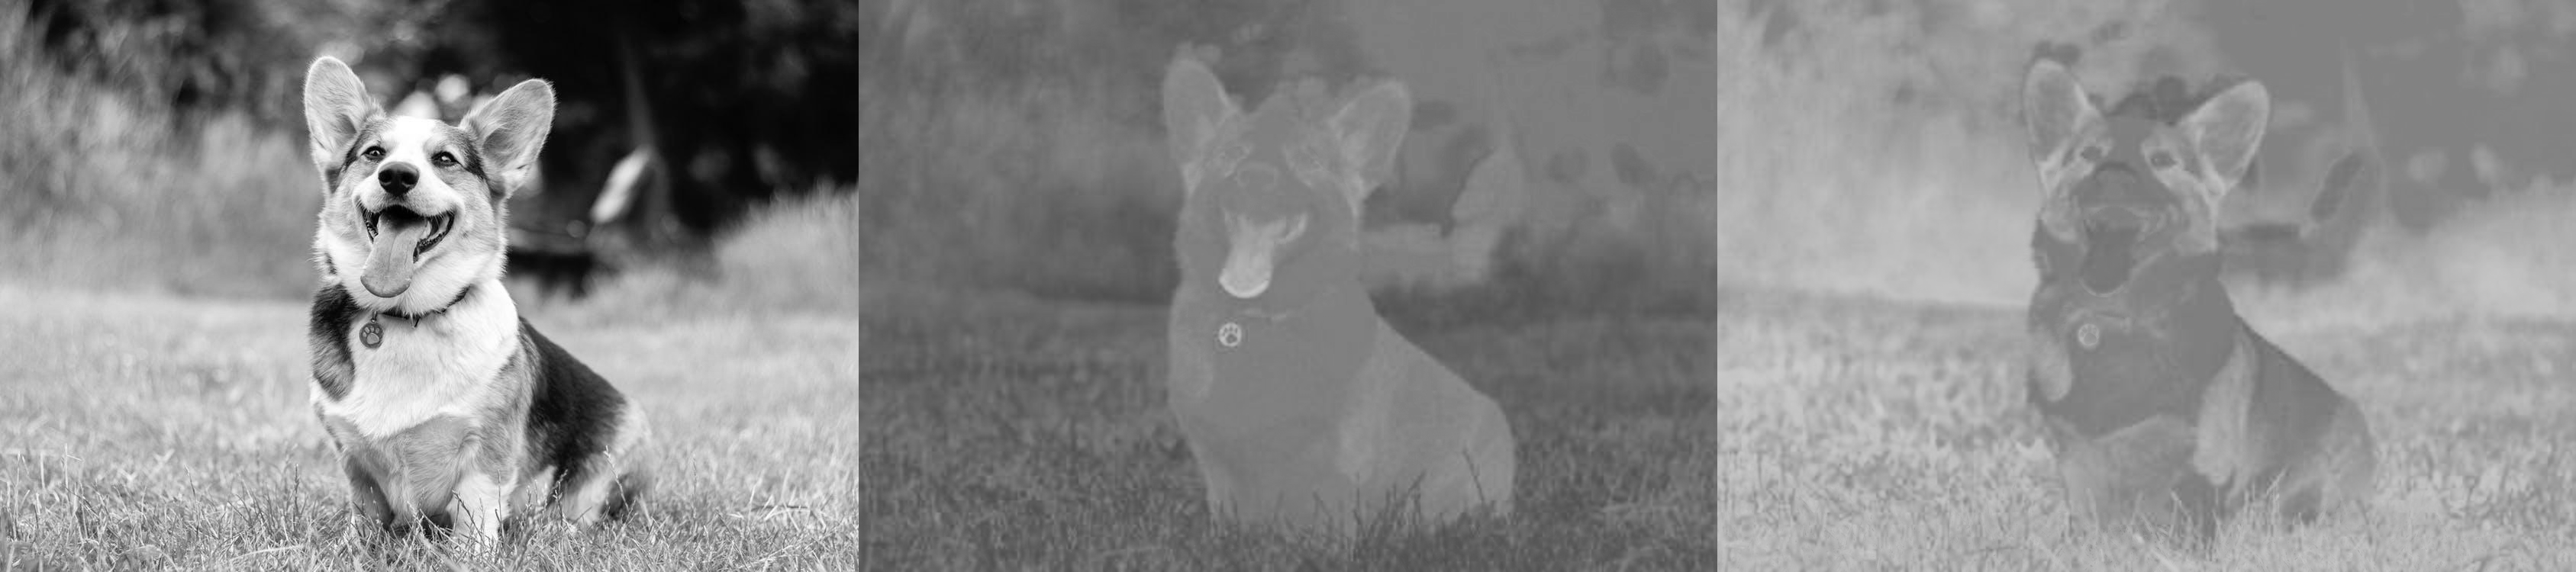

In [7]:
# Create an image showing all channels in a LAB format
lab = cv2.cvtColor(image_1, cv2.COLOR_RGB2LAB)
l = lab[:,:,0]
a = lab[:,:,1]
b = lab[:,:,2]

# Create the image showing all channels in LAB format
lab_split = np.concatenate((l, a, b), axis=1)

cv2_imshow(lab_split)

### **Thresholding**

Simple thresholding: 
* the pixels in an image whose values are greater than a fixed value (threshold, global) are assigned a specified value. 

Adaptive thresholding:
* similar to the simple thresholding, but the threshold value is computed per regions.

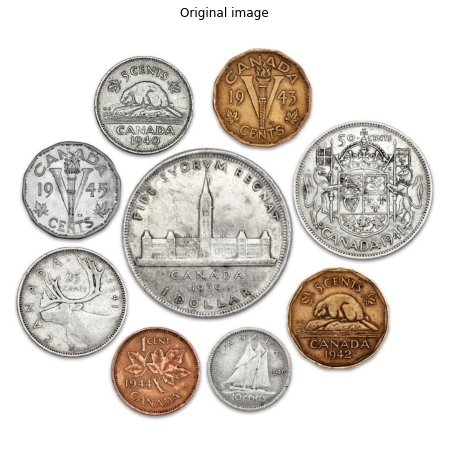

In [8]:
image_2 = cv2.imread('/content/drive/MyDrive/projects/colab-notebooks/images/coins.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plot_image(image_2, 'Original image', figsize=(8,8))

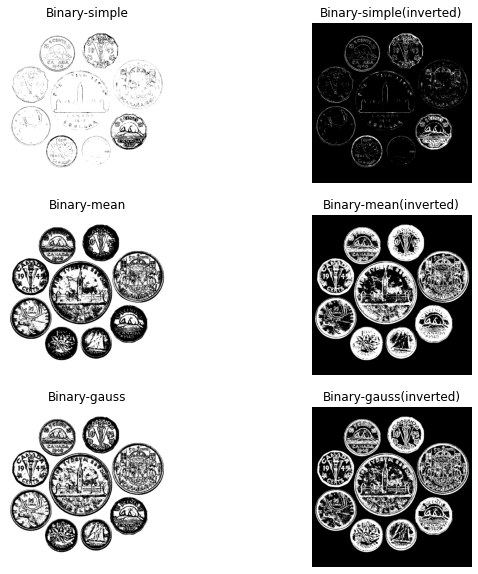

In [9]:
# Convert the color image into grayscale
gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

# Simple thresholding
ret, binary_simple = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
ret, binary_simple_inv = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

# Adaptive thresholding using the mean
# The threshold value us the mean pixel value of the region.
binary_mean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 115, 1)
binary_mean_inv = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 115, 1)

# Adaptive thresholding using the gaussian
# The threshold value is the weighted gaussian sum.
binary_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
binary_gauss_inv = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 115, 1)

images = [binary_simple, binary_simple_inv, binary_mean, binary_mean_inv, 
          binary_gauss, binary_gauss_inv]
images_titles = ['Binary-simple', 'Binary-simple(inverted)', 'Binary-mean',
             'Binary-mean(inverted)', 'Binary-gauss', 'Binary-gauss(inverted)']

subplot_images(images, images_titles)

### **Contour detection**
Finding the contours of an object means joining all the points on its boundary,
more exactly boundary pixels with the same intensity.
In order to apply the contour algorithms, the image has to be converted into grayscale and then into binary by applying thresholding.

We will use the inversed binary image resulted from the thresholding operation.
Black pixels will be considered background pixels and, therefore, ignored. Otherwise, the algorithm will also treat the borders of the original image as a
candidate for a contour, which is not necessary.


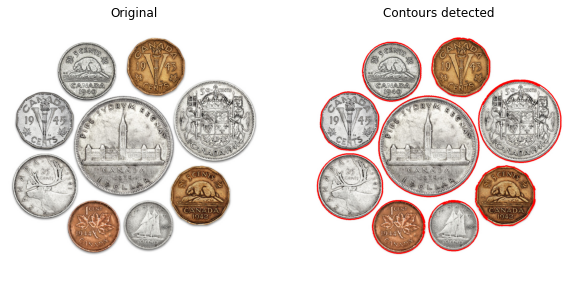

In [10]:
contours, hierarchy = cv2.findContours(image=binary_gauss_inv, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image_2.copy()
image_with_contours = cv2.drawContours(image=image_with_contours, contours=contours, contourIdx=-1, color=(255, 0 , 0), thickness=3)

image_and_contours = [image_2, image_with_contours]
image_and_contours_titles = ['Original', 'Contours detected']

subplot_images(image_and_contours, image_and_contours_titles)

### **Area, perimeter, center, curvature**

After finding the countours, one can further extract more information, such as the area, perimeter or centroid. 

Contour 0:
Area: 29941.5, perimeter: 839.192993760109, center: x=557, y=798
Contour 1:
Area: 33240.5, perimeter: 816.3645662069321, center: x=340, y=802
Contour 2:
Area: 42297.0, perimeter: 942.4305810928345, center: x=760, y=680
Contour 3:
Area: 52035.0, perimeter: 883.3767583370209, center: x=149, y=643
Contour 4:
Area: 122090.0, perimeter: 1338.6803603172302, center: x=459, y=485
Contour 5:
Area: 41367.0, perimeter: 778.5239458084106, center: x=147, y=386
Contour 6:
Area: 81731.5, perimeter: 1647.8590755462646, center: x=818, y=387
Contour 7:
Area: 41681.0, perimeter: 793.1513631343842, center: x=314, y=190
Contour 8:
Area: 41040.5, perimeter: 853.0508586168289, center: x=586, y=174


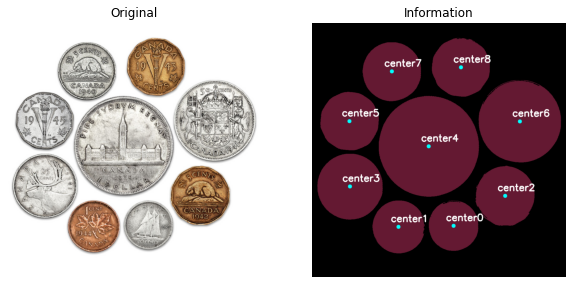

In [11]:
objects = np.zeros([image_2.shape[0], image_2.shape[1], 3], 'uint8')
contour_index = 0

for contour in contours:
  area = cv2.contourArea(contour)
  perimeter = cv2.arcLength(contour, True)
  moment = cv2.moments(contour)

  # Checking the area to get rid of some unwanted artifacts.
  if area > 50:
    # Compute the center in (x, y) coordinates
    center_x = int(moment['m10']/moment['m00'])
    center_y = int(moment['m01']/moment['m00'])
    
    # Draw the information in the new image
    cv2.drawContours(objects, [contour], -1, (100, 25, 50), -1)
    cv2.circle(objects, (center_x, center_y), 8, (0, 255 , 255), -1)
    cv2.putText(objects, 'center{}'.format(contour_index),
                (center_x - 30, center_y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 255, 255), 3)
    
    # Print the previously extracted information.
    print('Contour {}:\nArea: {}, perimeter: {}, center: x={}, y={}'.format(
        contour_index, area, perimeter, center_x, center_y))

    contour_index += 1

image_and_info = [image_2, objects]
image_and_info_titles = ['Original', 'Information']
subplot_images(image_and_info, image_and_info_titles)

### **Edge detection**

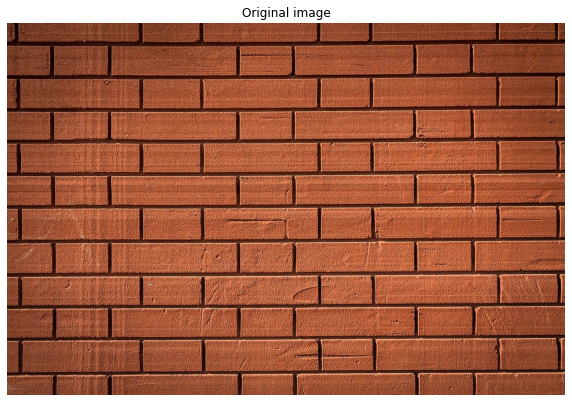

In [12]:
image_3 = cv2.imread('/content/drive/MyDrive/projects/colab-notebooks/images/brick.jpg')
image_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)
plot_image(image_3, 'Original image')

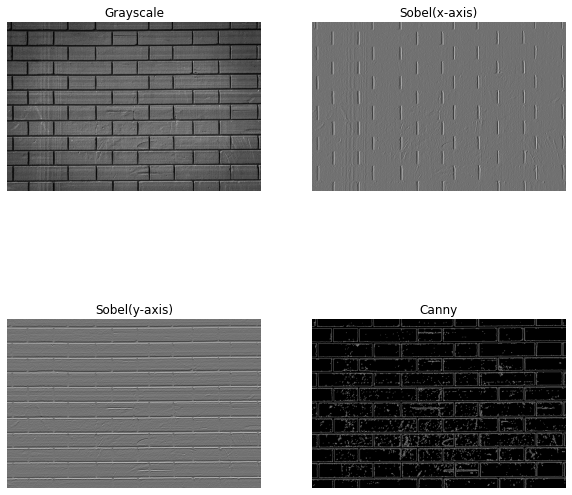

In [13]:
# Convert to grayscale
gray = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)

# Blur the image
kernel = (5, 5)
blur = cv2.GaussianBlur(gray, kernel, 0)

# Detection on the x axis
sobel_x = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=kernel[0])
# Detection on the y axis
sobel_y = cv2.Sobel(src=blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=kernel[0])

# Canny
canny = cv2.Canny(image=blur, threshold1=100, threshold2=150)

edge_images = [gray, sobel_x, sobel_y, canny]
edge_images_titles = ['Grayscale', 'Sobel(x-axis)', 'Sobel(y-axis)', 'Canny']

subplot_images(edge_images, edge_images_titles)
